# CSCI 480
# Chapter 10: Introduction to Artificial Neural Networks with Keras

+ ANNs are at the very core of Deep Learning.
+ ideal to tackle large and highly complex Machine Learning tasks
    - classifying billions of images (e.g., Google Images)
    - powering speech recogni‐ tion services (e.g., Apple’s Siri)
    - recommending the best videos to watch to hundreds of millions of users every day (e.g., YouTube)
    - learning to beat the world champion at the game of Go by playing millions of games against itself (DeepMind’s Alpha‐ Zero)

## From Biological to Artificial Neurons
+ In 1943, in their paper [A Logical Calculus of Ideas Immanent in Nervous Activity](https://www.cs.cmu.edu/~./epxing/Class/10715/reading/McCulloch.and.Pitts.pdf), the neurophysiologist Warren McCulloch and the mathematician Walter Pitts presented a simplified computational model of how biological neurons might work together in animal brains to perform complex computations using propositional logic.
+ ANN waves

![ANN waves](https://www.researchgate.net/profile/David-Macedo-4/publication/330838896/figure/fig1/AS:722098146246656@1549173022089/The-three-historical-waves-of-artificial-neural-networks-research-GOODFELLOW-BENGIO.png)

+ Why ANN came back agian and will last long?
    - There is now a huge quantity of data available to train neural networks, and ANNs frequently outperform other ML techniques on very large and complex problems.
    - The tremendous increase in computing power since the 1990s now makes it pos‐ sible to train large neural networks in a reasonable amount of time. This is in part due to Moore’s Law, but also thanks to the gaming industry, which has pro‐ duced powerful GPU cards by the millions.
    - The training algorithms have been improved. To be fair they are only slightly dif‐ ferent from the ones used in the 1990s, but these relatively small tweaks have a huge positive impact.
    - Some theoretical limitations of ANNs have turned out to be benign in practice. For example, many people thought that ANN training algorithms were doomed because they were likely to get stuck in local optima, but it turns out that this is rather rare in practice (or when it is the case, they are usually fairly close to the global optimum).
    - ANNs seem to have entered a virtuous circle of funding and progress. 

## Biological Neurons
![Biological Neurons](https://upload.wikimedia.org/wikipedia/commons/1/10/Blausen_0657_MultipolarNeuron.png)

## Biological Neuron Network
![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Cajal_actx_inter.jpg/300px-Cajal_actx_inter.jpg)

## Logical Computations with Neurons
+ artificial neuron: a very simple model of the biological neuron
    - C = A
    - C = A and B
    - C = A or B
    - C = not B (if A is active all the time) 

![Logical Computations with Neurons](https://www.oreilly.com/library/view/neural-networks-and/9781492037354/assets/mlst_1003.png)



## The Perceptron (Single-layer Perceptron)
+ based on `threshold logic unit (TLU)`

![](../Resources/ch10-perceptron.png)

+ The TLU computes a weighted sum of its inputs
    
    $$z = w_1 x_1 + w_2 x_2 + \ldots + w_n x_n = x^T w$$
    
+ then applies a step function to that sum and outputs the result: 
    
    $$
    h_w(x) = step(z), where z = x^T w.
    $$
    
    - Step function
   $$ heaviside(z)=   \left\{
\begin{array}{ll}
      0 &  if \space z \lt 0 \\
      1 &  if \space z \ge 0 \\
\end{array} 
\right.  $$

    - or

   $$ sgn(z)=   \left\{
\begin{array}{ll}
      -1 &  if \space z \lt 0 \\
      0 &  if \space z = 0 \\
      1 &  if \space z \gt 0 \\
\end{array} 
\right.  $$

+ A Perceptron is simply composed of a single layer of TLUs, with each TLU connected to all the inputs.
    - When all the neurons in a layer are connected to every neuron in the previous layer (i.e., its input neurons), it is called a fully connected layer or a dense layer. 

    ![](../Resources/ch10-perceptron2.png)

    - compute the outputs of a layer of artificial neurons for several instances at once
        + X represents the matrix of input features. It has one row per instance, one column per feature.
        + The weight matrix W contains all the connection weights except for the ones from the bias neuron.
        + The bias vector b contains all the connection weights between the bias neuron and the artificial neurons.
        + The function φ is called the activation function. when the artificial neurons are TLUs, it is a step function.
    $$h_{W,b} = \phi(XW+b)$$
    
+ Perceptron learning rule: Hebb’s rule
    - the connection weight between two neurons is increased whenever they have the same output. 
    $$w_{i,j}^{(next step)} = w_{i,j} + \eta (y_j - \hat{y}_j)x_i$$
    
       + $w_{i,j}$ is the connection weight between the $i^{th}$ input neuron and the $j^{th}$ output neuron.
       + $x_i$ is the $i^{th}$ input value of the current training instance.
       + $\hat{y}_j$ is the output of the $j^{th}$ output neuron for the current training instance.
       + $y_j$ is the target output of the $j^{th}$ output neuron for the current training instance.
       + $\eta$ is the learning rate.
  
+ Note: Perceptron is incaple of learning complex patterns (e.g., the data can not be separated by linear boundaries). 

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [3]:
iris = load_iris()
X = iris.data[:, (2, 3)] # petal length, petal width
y = (iris.target == 0).astype(np.int32) # Iris Setosa?

In [4]:
per_clf = Perceptron()
per_clf.fit(X, y)

Perceptron()

In [5]:
y_pred = per_clf.predict([[2, 0.5]])

### Perceptron vs Stochastic Gradient Descent
+ Perceptron learning algorithm strongly resembles Stochastic Gradient Descent.
+ In fact, Scikit-Learn’s Perceptron class is equivalent to using an SGDClassifier with the following hyperparameters: loss="perceptron", learning_rate="constant", eta0=1 (the learning rate), and penalty=None (no regu‐ larization).
### Perceptron vs Logistic Regression
+ Perceptrons do not output a class probability.
+ This is one of the good reasons to prefer Logistic Regression over Perceptrons.
### Weaknesses of Perceptrons
+ incapable of solving some trivial problems (e.g., the Exclusive OR (XOR) classification problem

![OR VS XOR](https://res.cloudinary.com/practicaldev/image/fetch/s--NK5uRtLC--/c_imagga_scale,f_auto,fl_progressive,h_900,q_auto,w_1600/https://dev-to-uploads.s3.amazonaws.com/i/lkli02223oqhlac1jetz.png)

![xor](https://i1.wp.com/www.tech-quantum.com/wp-content/uploads/2019/03/XOR-Problem.png?fit=800%2C451&ssl=1)

## Multi-Layer Perceptron and Backpropagation
+ An MLP is composed of one (passthrough) input layer, one or more layers of TLUs, called hidden layers, and one final layer of TLUs called the output layer.

![](../Resources/ch10-mlp.png)

+ When an ANN contains a deep stack of hidden layers8, it is called a deep neural net‐ work (DNN).

### Backpropagation: a way to train MLPs
+ simply Gradient Descent using an efficient technique for computing the gradients automatically in just two passes through the network (one forward, one backward)
+ the backpropagation algo‐ rithm is able to compute the gradient of the network’s error with regards to every sin‐ gle model parameter.
+ In other words, it can find out how each connection weight and each bias term should be tweaked in order to reduce the error.

+ `Backpropagation Algorithm`
    - It handles one `mini-batch` at a time, and it goes through the full training set multiple times. Each pass is called an epoch.
    - `forward pass`: mini-batch -> input layer -> hidden layer(s) -> output layer. it is exactly like making predictions, except all intermediate results are preserved since they are needed for the backward pass.
    - Next, the algorithm measures the network’s output error (compare the output with the target: $y$ vs $\hat{y}$)
    - Then it computes how much each output connection contributed to the error analytically by simply applying the [`chain rule`](https://en.wikipedia.org/wiki/Chain_rule).
    - `backward pass`: The algorithm then measures how much of these error contributions came from each connection in the layer below, again using the chain rule, by propagating the error gradient backward through the network.
    - Finally, the algorithm performs a Gradient Descent step to tweak all the connec‐ tion weights in the network, using the error gradients it just computed.

+ Summary

`This algorithm is so important, it’s worth summarizing it again: for each training instance the backpropagation algorithm first makes a prediction (forward pass), measures the error, then goes through each layer in reverse to measure the error con‐ tribution from each connection (reverse pass), and finally slightly tweaks the connec‐ tion weights to reduce the error (Gradient Descent step).`

### Activation functions for MLPs with Backpropagation
+ replace step function with
   - logistic function
   $$
   \sigma(z) = \dfrac{1}{1+exp(-z)}
   $$
   - hyperbolic tangent function 
   $$
       tanh(z) = 2\sigma(2z)-1
   $$
   - Rectified Linear Unit function(ReLU is one of the most commonly used activation function in deep learning):
   $$
   ReLU(z) = max(0, z)
   $$
   
 
![activation functions and their derivatives](https://www.oreilly.com/library/view/neural-networks-and/9781492037354/assets/mlst_1008.png)

## Regression MLPs
+ If you want to predict a single value, you just need a single output neuron.
+ For multivariate regression, you need one output neuron per output dimension.
+ In general, when building an MLP for regression, you do not want to use any activa‐ tion function for the output neurons, so they are free to output any range of values.
+ However, if you want to guarantee that the output will always be positive, then you can use the ReLU activation function, or the softplus activation function in the output layer.
+ Finally, if you want to guarantee that the predictions will fall within a given range of values, then you can use the logistic function or the hyperbolic tangent, and scale the labels to the appropriate range: 0 to 1 for the logistic function, or –1 to 1 for the hyperbolic tangent.
+ The loss function to use during training is typically the `mean squared error`, but if you have a lot of outliers in the training set, you may prefer to use the `mean absolute error` instead. Alternatively, you can use the `Huber loss`, which is a combination of both.
+ Typical Regression MLP Architecture

|Hyperparameter|Typical Value|
|---|---|
|# input neurons|One per input feature (e.g., 28 x 28 = 784 for MNIST)|
|# hidden layers|Depends on the problem. Typically 1 to 5.|
|# neurons per hidden layer|Depends on the problem. Typically 10 to 100.|
|# output neurons|1 per prediction dimension|
|Hidden activation|ReLU (or SELU, see Chapter 11)|
|Output activation|None or ReLU/Softplus (if positive outputs) or Logistic/Tanh (if bounded outputs)|
|Loss function|MSE or MAE/Huber (if outliers)|

## Classification MLPs
+ For a binary classification problem, you just need a single output neuron using the logistic activation function.
+ MLPs can also easily handle multilabel binary classification tasks. In this case, you would need multiple output neurons, both using the logistic activation function.
+ For a multiclass classification problem, you need to have one output neuron per class, and you should use the softmax activation function for the whole output layer.

![](../Resources/ch10-multiclass.png)

+ Typical Classification MLP Architecture

|Hyperparameter|Binary classification|Multilabel binary classification|Multiclass classification|
|---|---|---|---|
|Input and hidden layers|Same as regression|Same as regression|Same as regression|
|# output neurons|1|1 per label|1 per class|
|Output layer activation|logistic|logistic|softmax|
|loss function|Cross-Entropy|Cross-Entropy|Cross-Entropy|

## Implementing MLPs with Keras
+ [Keras](https://keras.io) is a high-level Deep Learning API that allows you to easily build, train, evaluate and execute all sorts of neural networks.
+ Two Keras implementations: Keras-team and tf.keras(keras in Tensorflow, we will use tf.keras in our class)

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQYKhfHmW84jKHAm10LlWV5pmtSTMuh91dUs2wIGS--8LEYf20576nbN0YZM5OyfK2kV68&usqp=CAU)

### Installing TensorFlow 2
~~~~
python3 -m pip install --upgrade tensorflow
~~~~
For GPU support, you need to install `tensorflow-gpu` instead of `tensorflow`, and there are other libraries to install. See https://tensorflow.org/install/gpu for more details.

In [7]:
import tensorflow as tf
from tensorflow import keras

In [8]:
print("tensorflow version: ", tf.__version__)
# Note that it ends with -tf, highlighting the fact that tf.keras implements the Keras API, plus some extra TensorFlow-specific features.
print("keras version: ", keras.__version__)

tensorflow version:  2.4.1
keras version:  2.4.0


### Building an Image Classifier Using the Sequential API
#### Using Keras to Load the Dataset
+ the images represent fashion items rather than handwritten digits, so each class is more diverse and the problem turns out to be significantly more challenging than MNIST.

In [9]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


+ since we are going to train the neural network using Gradient Descent, we must scale the input features.
+ For simplicity, we just scale the pixel intensities down to the 0-1 range by dividing them by 255.0(this also converts them to floats)

In [10]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                   "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [12]:
class_names[y_train[0]]

'Coat'

![fashion mnist example](https://www.researchgate.net/profile/Saeed-Reza-Kheradpisheh/publication/342801790/figure/fig2/AS:911232181735425@1594266090934/Sample-images-from-Fashion-MNIST-dataset.png)
#### Creating the Model Using the Sequential API
+ Line 1 (of the next cell): creates a Sequential model, a neural network that is just composed of a single stack of layers, connected sequentially. 
+ Line 2: builds the first layer and add it to the model. `Flatten` converts each input image into a 1D array.
+ Line 3: adds a Dense hidden layer with 300 neurons, and uses the ReLU activation function. 
    - Each Dense layer manages its own weight matrix
    - It also manages a vector of bias terms (one per neuron).
    - For other activation functions, see https://keras.io/activations/
+ Line 4: adds a second Dense hidden layer with 100 neurons, also uses the ReLU activation function.
+ Line 5: adds a Dense output layer with 10 neurons (one per class), using the softmax activation function(this is a multiclass classification problem).

In [49]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

+ We can also combine the code above in one statement

In [62]:
model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dense(300, activation="relu"),
        keras.layers.Dense(100, activation="relu"),
        keras.layers.Dense(10, activation="softmax")
])

+ The model’s summary() method displays all the model’s layers

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


+ You can easily get a model’s list of layers, to fetch a layer by its index, or you can fetch it by name

In [16]:
model.layers

In [17]:
model.layers[1].name

'dense_3'

In [18]:
model.get_layer('dense_3').name

'dense_3'

+ All the parameters of a layer can be accessed using its get_weights() and set_weights() method. For a Dense layer, this includes both the connection weights and the bias terms:

In [23]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

In [24]:
weights

array([[-0.06429768, -0.06606724,  0.02467071, ..., -0.05313261,
        -0.04990781,  0.01793566],
       [-0.02394059, -0.02384443, -0.02873898, ...,  0.00780939,
        -0.01034213,  0.05872054],
       [-0.05016194, -0.06758564, -0.01342009, ...,  0.04782038,
         0.04958003,  0.03458665],
       ...,
       [ 0.03488541,  0.01060686,  0.03757443, ..., -0.02286218,
         0.05683467,  0.0406133 ],
       [ 0.02074627,  0.04259919,  0.00565634, ..., -0.00015141,
        -0.05520375,  0.01094227],
       [ 0.03369625,  0.03859156,  0.05131359, ..., -0.02671528,
         0.00513736, -0.05501113]], dtype=float32)

In [25]:
weights.shape

(784, 300)

In [26]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [27]:
biases.shape

(300,)

+ Notice that the Dense layer initialized the connection weights randomly (which is needed to break symmetry, as we discussed earlier), and the biases were just initial‐ ized to zeros, which is fine. If you ever want to use a different initialization method, you can set kernel_initializer (kernel is another name for the matrix of connec‐ tion weights) or bias_initializer when creating the layer. We will discuss initializ‐ ers further in Chapter 11, but if you want the full list, see https://keras.io/initializers/.

#### Compiling the Model
+ After a model is created, you must call its compile() method to specify the loss func‐ tion and the optimizer to use. Optionally, you can also specify a list of extra metrics to compute during training and evaluation:
+ For other losses, see https://keras.io/losses/
    - If the labels are `sparse`: `[0,1,2,3,4,5,6,7,8,9]`, we use sparse_categorical_crossentropy.
    - If the labels are `one-hot-encoded`, we use `categorical_crossentropy`.
    - If we do `binary classification` (with one or more binary labels), then we would use the "sigmoid" (i.e., logistic) activation function in the output layer instead of the "softmax" activation function, we use `binary_crossentropy`.
+ For other optimizers, see https://keras.io/optimizers/ 
+ For other metrics, see https://keras.io/metrics/.

In [63]:
model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="sgd",
                  metrics=["accuracy"])

#### Training and Evaluating the Model
+ train the model on the training set
+ also use the validation set to detect the potential overfitting(the performance on the training set is much better than on the validation set) or some bug(e.g.,a data mis‐ match between the training set and the validation set)
+ At each epoch during training, Keras displays the number of instances processed so far (along with a progress bar), the mean training time per sample, the loss and accuracy (or any other extra metrics you asked for), both on the training set and the validation set.

In [65]:
# the defaut batch_size is 32: batch_size=32
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.9840 - accuracy: 0.7014 - val_loss: 0.5204 - val_accuracy: 0.8170
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4990 - accuracy: 0.8264 - val_loss: 0.4380 - val_accuracy: 0.8478
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4501 - accuracy: 0.8439 - val_loss: 0.4181 - val_accuracy: 0.8586
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4247 - accuracy: 0.8516 - val_loss: 0.3852 - val_accuracy: 0.8706
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3981 - accuracy: 0.8598 - val_loss: 0.3834 - val_accuracy: 0.8716
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3788 - accuracy: 0.8647 - val_loss: 0.3637 - val_accuracy: 0.8762
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3605 - accuracy: 0.8733 - val_loss: 0.3648 - val_accuracy:

+ If the training set was very skewed, with some classes being overrepresented and oth‐ ers underrepresented, it would be useful to set the class_weight argument when calling the fit() method, giving a larger weight to underrepresented classes, and a lower weight to overrepresented classes. These weights would be used by Keras when computing the loss.
+ If you need per-instance weights instead, you can set the sam ple_weight argument (it supersedes class_weight). This could be useful for exam‐ ple if some instances were labeled by experts while others were labeled using a crowdsourcing platform: you might want to give more weight to the former.
+ You can also provide sample weights (but not class weights) for the validation set by adding them as a third item in the validation_data tuple.

+ The fit() method returns a History object containing 
    - the training parameters (his tory.params)
    - the list of epochs it went through (history.epoch)
    - and most impor‐ tantly a dictionary (history.history) containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set.
 

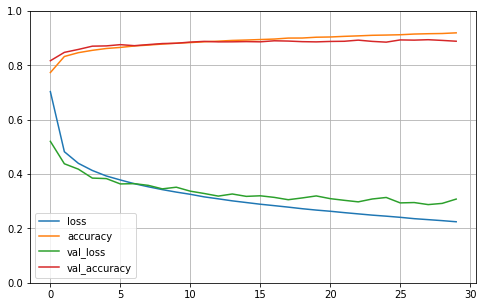

In [66]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

+ If you are not satisfied with the performance of your model, you should go back and tune the model’s hyperparameters
    - the number of layers
    - the number of neurons per layer
    - the types of activation functions we use for each hidden layer
    - the number of training epochs
    - the batch size
    
+ Once you are satisfied with your model’s validation accuracy, you should evaluate it on the test set to estimate the generalization error before you deploy the model to production. 

In [67]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 76.0464 - accuracy: 0.8307


[76.0464096069336, 0.8306999802589417]

#### Using the Model to Make Predictions

In [68]:
X_new = X_test[:5]
y_proba = model.predict(X_new)
print(y_proba.round(2))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [69]:
y_hat = np.argmax(y_proba, axis=-1)
print(y_hat)

[9 2 1 1 0]


In [71]:
X_new = X_train[:3]
y_proba = model.predict(X_new)
print(y_proba.round(2))

[[0.   0.   0.3  0.   0.67 0.   0.03 0.   0.   0.  ]
 [0.94 0.   0.   0.   0.   0.   0.06 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.85 0.   0.15]]


In [72]:
y_hat = np.argmax(y_proba, axis=-1)
print(y_hat)

[4 0 7]


### Building a Regression MLP Using the Sequential API
+ Building, training, evaluating and using a regression MLP using the Sequential API to make predictions is quite similar to what we did for classification.
+ The main differ‐ ences are the fact that the output layer has a single neuron (since we only want to predict a single value) and uses no activation function.
+ and the loss function is the mean squared error. 

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
# '.' => save the data in the current folder, you can also specify your own location
housing = fetch_california_housing(data_home='.')
X_train_full, X_test, y_train_full, y_test = train_test_split(
        housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
        X_train_full, y_train_full)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

+ Since the dataset is quite noisy, we just use a single hidden layer with fewer neurons than before, to avoid overfitting:

In [31]:
model = keras.models.Sequential([
        keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
        keras.layers.Dense(1)
    ])

model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train_scaled, y_train, epochs=20,
                        validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.4172 - val_loss: 0.5982
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6075 - val_loss: 0.4742
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4861 - val_loss: 0.4954
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5161 - val_loss: 0.4435
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4735 - val_loss: 0.4345
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4492 - val_loss: 0.4222
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4434 - val_loss: 0.4161
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4623 - val_loss: 0.4203
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4308 - val_loss: 0.4102
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4099 - val_loss: 0.4110

In [24]:
mse_test = model.evaluate(X_test_scaled, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3854


In [33]:
X_new = X_test[:3] # pretend these are new instances

y_pred = model.predict(scaler.transform(X_new))
print(y_pred)

[[1.404094 ]
 [2.5365233]
 [3.8159509]]


# Building Complex/non-sequential Models Using the Functional API
+ [Reference Paper](https://arxiv.org/abs/1606.07792)
+ It connects all or part of the inputs directly to the output layer
    - This architecture makes it possible for the neural network to learn both deep patterns (using the deep path) and simple rules (through the short path).
    - A regular MLP forces all the data to flow through the full stack of layers, thus simple patterns in the data may end up being distorted by this sequence of transfor‐ mations.
    
![ch10-wide.png](../Resources/ch10-wide.png)



In [43]:
# First, we need to create an Input object.
input = keras.layers.Input(shape=X_train.shape[1:])
# Next, we create a Dense layer with 30 neurons and using the ReLU activation function. As soon as it is created, notice that we call it like a function, passing it the input. This is why this is called the Functional API.
hidden1 = keras.layers.Dense(30, activation="relu")(input)
# We then create a second hidden layer, and again we use it as a function.
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
# Next, we create a Concatenate() layer, and once again we immediately use it like a function, to concatenate the input and the output of the second hidden layer
concat = keras.layers.Concatenate()([input, hidden2])
# Then we create the output layer, with a single neuron and no activation function.
output = keras.layers.Dense(1)(concat)
# Lastly, we create a Keras Model, specifying which inputs and outputs to use.
model = keras.models.Model(inputs=[input], outputs=[output])

+ First, we need to create an Input object.
+ Next, we create a Dense layer with 30 neurons and using the ReLU activation function. As soon as it is created, notice that we call it like a function, passing it the input. This is why this is called the Functional API.
+ We then create a second hidden layer, and again we use it as a function.
+ Next, we create a Concatenate() layer, and once again we immediately use it like a function, to concatenate the input and the output of the second hidden layer
+ Then we create the output layer, with a single neuron and no activation function.
+ Lastly, we create a Keras Model, specifying which inputs and outputs to use.
#### Once you have built the Keras model, everything is exactly like earlier, so no need to repeat it here: you must compile the model, train it, evaluate it and use it to make predictions

In [44]:
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train_scaled, y_train, epochs=4,
                        validation_data=(X_valid_scaled, y_valid))

Epoch 1/4
363/363 [==============================] - 1s 3ms/step - loss: 1.3031 - val_loss: 4.6872
Epoch 2/4
363/363 [==============================] - 1s 2ms/step - loss: 1.5921 - val_loss: 4.4882
Epoch 3/4
363/363 [==============================] - 1s 2ms/step - loss: 1.2776 - val_loss: 1.4511
Epoch 4/4
363/363 [==============================] - 1s 2ms/step - loss: 1.5942 - val_loss: 0.5185


In [45]:
mse_test = model.evaluate(X_test_scaled, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4857


In [47]:
X_new = X_test[:3] # pretend these are new instances

y_pred = model.predict(scaler.transform(X_new))
print(y_pred)

[[1.5826242]
 [2.16786  ]
 [3.5506988]]


+ What if you want to send a subset of the features through the wide path, and a different subset (possibly overlapping) through the deep path?

![wide2](../Resources/ch10-wide2.png)


In [53]:
input_A = keras.layers.Input(shape=[5]) # features 0-4
input_B = keras.layers.Input(shape=[6]) # features 2-7
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [54]:
model.compile(loss="mse", optimizer="sgd")

In [52]:
X_train_A, X_train_B = X_train_scaled[:, :5], X_train_scaled[:, 2:]
X_valid_A, X_valid_B = X_valid_scaled[:, :5], X_valid_scaled[:, 2:]
X_test_A, X_test_B = X_test_scaled[:, :5], X_test_scaled[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [51]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                        validation_data=((X_valid_A, X_valid_B), y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 [==============================] - 1s 2